# Исследование надежности заемщиков.

**Заказчик** — кредитный отдел банка. 

**Входные данные от банка** — статистика о платёжеспособности клиентов.

**Цель исследования**  - изучение влияния семейного положения и количества детей клиента на факт погашения кредита в срок. 

**Результаты исследования** будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Обзор данных

Описание данных
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

Импортируем необходимые для анализа библиотеки и читаем присланный заказчиком файл с данными.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1RhE-cb_tYSW7zotwkqguY-hlW-Xm8kUM')

Проанализируем структуру, полноту данных таблицы, а также экстремумы по столбцам

In [3]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [6]:
df.isna().mean().sort_values(ascending=False)

days_employed       0.100999
total_income        0.100999
children            0.000000
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
purpose             0.000000
dtype: float64

При первом взгляде на таблицу можно сделать следующие примечания:
 - мы имеем более 21 тысяч клиентов для анализа влияния разных факторов на платежеспособность по кредиту
 - все столбцы проименованы корректно
 - в столбцах `days_employed` и `total_income` имееются пропуски (по 10% от массива)
 - в столбце `days_employed`(дни трудового стажа) присутствуют отрицательные значения, что является явной ошибкой
 - в столбце `education` присутствуют неявные дубликаты (разный регистр написания)
 - в столбце `children` отрицательные значения (количество детей не уходит в минус)
 - в столбце `dob_years` есть нулевые значения (возраст не может быть нулевым)
 - в столбцах `days_employed` и `total_income` можно поменять тип данных с дробных на целочисельные

## Предобработка данных

### Исправление данных о детях

Посмотрим распределение по количеству детей

In [7]:
children_stat = pd.concat([df['children'].value_counts(dropna=False)
                           ,df['children'].value_counts(dropna=False) / len(df)], axis=1)
children_stat.columns = ['number', '%']
children_stat

,number,%
0,14149,0.657329
1,4818,0.223833
2,2055,0.095470
3,330,0.015331
20,76,0.003531
-1,47,0.002184
4,41,0.001905
5,9,0.000418


Мы видим две аномалии в данных о детях:
* `-1` - 47 записей (доля - 0,2%)
* `20` - 76 записей (доля - 0.3%)

Доля аномалий довольно мала в нашем случае. Заменим аномальные значения на медианные.

In [8]:
# найдем медианное значение без аномалий
children_median = df.loc[(df['children'] != 20) & (df['children'] != -1), 'children'].median()

df['children'] = df['children'].replace([-1, 20], children_median)

df['children'].value_counts(dropna=False)

0.0    14272
1.0     4818
2.0     2055
3.0      330
4.0       41
5.0        9
Name: children, dtype: int64

Аномалии исправлены

### Исправление данных о поле

In [9]:
df['gender'].value_counts(dropna=False)

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

В данных о поле клиента мы видим одну странную запись со значением `XNA`.

Заменим эту запись на моду по столбцу пола.

In [10]:
df.loc[df['gender'] == 'XNA', 'gender'] = df['gender'].mode()[0]
df['gender'].value_counts(dropna=False)

F    14237
M     7288
Name: gender, dtype: int64

Некорректные данные о поле исправлены

### Исправление данных о возрасте

In [11]:
df_null_age = df[df['dob_years'] == 0]
print("Количество строк с нулевым возрастом - ", df_null_age['dob_years'].count())

Количество строк с нулевым возрастом -  101


Мы имеем **101** нулевое значение возраста, что весьма мало от общего объема выборки. Заменим их средними значениями, но сделаем это в зависимости от *типа занятости* (ведь *пенсионеры* в среднем старше, а *студенты* моложе, кстати проверим это)

In [12]:
# оценим средний возраст по типам занятости
df[df['dob_years'] != 0].groupby('income_type')['dob_years'].mean()

income_type
безработный        38.000000
в декрете          39.000000
госслужащий        40.804542
компаньон          39.854294
пенсионер          59.370959
предприниматель    42.500000
сотрудник          40.018980
студент            22.000000
Name: dob_years, dtype: float64

Действительно выделяются из общей массы по среднему возрасту *пенсионеры* и *студенты*. Для их групп будем считать средний возраст отдельно от остальной общей массы.

Посмотрим есть ли *пенсионеры* и *студенты* среди нулевых значений возраста.

In [13]:
df_null_age.groupby('income_type')['dob_years'].count()

income_type
госслужащий     6
компаньон      20
пенсионер      20
сотрудник      55
Name: dob_years, dtype: int64

Есть только *пенсионеры*.

Напишем функцию для замены нулевых значений возраста.

In [14]:
# сохраним в переменные отдельно средний возраст пенсионеров и остальных категорий занятости
mean_age_ritiree = int(df[(df['dob_years'] != 0) & (df['income_type'] == 'пенсионер')]['dob_years'].mean())
mean_age_other = int(df[(df['dob_years'] != 0) & (df['income_type'] != 'пенсионер') & (df['income_type'] != 'студент')]['dob_years'].mean())
# напишем функцию исправления нулевых значений возраста   
def correction_null_age(row):
    if row['dob_years'] == 0:
        if row['income_type'] == 'пенсионер':
            row['dob_years'] = mean_age_ritiree
        else:
            row['dob_years'] = mean_age_other
    return row

In [15]:
df = df.apply(correction_null_age, axis=1)
df['dob_years'].agg(['min','max'])

min    19
max    75
Name: dob_years, dtype: int64

Исправили все нулевые значения. Теперь значения возраста колеблятся в пределах от 19 до 75 лет.

###  Исправление данных о трудовом стаже

Детально посмотрим какие проблемы с данными о трудовом стаже

In [16]:
# определяем кол-во пропусков значений в столбце `days_employed`
print('Количество пропусков данных -', df['days_employed'].isna().sum())

Количество пропусков данных - 2174


In [17]:
# определяем кол-во отрицательных значений в столбце `days_employed`
print('Количество отрицательных значений -', len(df[df['days_employed'] < 0]['days_employed']))

Количество отрицательных значений - 15906


In [18]:
#определяем среднее и максимальное значение в столбце `days_employed`
print('Максимальное значение -', df['days_employed'].max())
print('Среднее значение -', df['days_employed'].mean())

Максимальное значение - 401755.40047533
Среднее значение - 63046.497661473615


В итоге мы имеем, что из 21525 записей о трудовом стаже:
 - 2174 (10%) - пропуски
 - 15906 (74%) - отрицательные значения = ошибка
 - 3445 (16%) - положительные значения = корректные данные
 
Даже при таком большом количестве отрицательных значений среднее значение трудового стажа получается ~63 тыс дней (172 года), а максимальное - вообще порядка 1100 лет. С данными по трудовому стажу явно что-то не так.
    
Посмотрим разброс значений и среднее трудового стажа в зависимости от типа занятости:

In [19]:
df.groupby('income_type')['days_employed'].agg(['count' , 'mean', 'min','max',]).sort_values(by='mean', ascending=False)

,count,mean,min,max
income_type,,,,
безработный,2,366413.652744,337524.466835,395302.838654
пенсионер,3443,365003.491245,328728.720605,401755.400475
предприниматель,1,-520.848083,-520.848083,-520.848083
студент,1,-578.751554,-578.751554,-578.751554
компаньон,4577,-2111.524398,-17615.563266,-30.195337
сотрудник,10014,-2326.499216,-18388.949901,-24.141633
в декрете,1,-3296.759962,-3296.759962,-3296.759962
госслужащий,1312,-3399.896902,-15193.032201,-39.954170


Все немного проясняется. У безработных и пенсионеров в среднем около 1000 лет трудового стажа, что является конечно же аномалией, по остальным группам -  отрицательные значения, что также в свою очередь не может быть правдой.
По-хорошему нужно бы уточнить у банка информацию по предоставленным данным о трудовом стаже.

Но пока примем для себя следующие допущения:
* в данных по `пенсионерам` и `безработным` не соблюдена размерность иданные указаны наверное в часах (330000 часов ~ 14000 дней) 
* данные в остальных категориях ошибочно внесены с отрицательными значениями


Напишем функцию для исправления данных о трудовом стаже

In [20]:
def correction_days_employed(row):
    if row['income_type'] in ['пенсионер', 'безработный']: # в случае пенсионеров и безработных делим на 24 для перевода из часов в дни
        row['days_employed'] /= 24
    else:
        row['days_employed'] *= -1 # в остальных случаях меняем знак
    return row

In [21]:
df = df.apply(correction_days_employed, axis=1)
df.groupby('income_type')['days_employed'].agg(['count', 'mean', 'min','max',]).sort_values(by='mean', ascending=False)

,count,mean,min,max
income_type,,,,
безработный,2,15267.235531,14063.519451,16470.951611
пенсионер,3443,15208.478802,13697.030025,16739.808353
госслужащий,1312,3399.896902,39.954170,15193.032201
в декрете,1,3296.759962,3296.759962,3296.759962
сотрудник,10014,2326.499216,24.141633,18388.949901
компаньон,4577,2111.524398,30.195337,17615.563266
студент,1,578.751554,578.751554,578.751554
предприниматель,1,520.848083,520.848083,520.848083


Отрицательные и аномальные данные исправили вроде. Для пенсионеров 15000 дней ~ 40 лет - вроде бы нормальные значения.

Но можно посмотреть еще на диаграмму рассеяния



<AxesSubplot:xlabel='days_employed', ylabel='dob_years'>

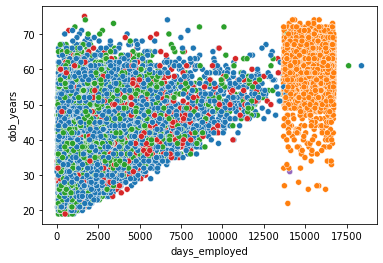

In [22]:
sns.scatterplot(x=df['days_employed'], y=df['dob_years'], hue=df['income_type'], legend=False) # с исправленными значениями

Вроде бы исправленные значения по среднему похожи на правду, но все равно есть значения где 25 летний пенсионер имеет 13000 часов  трудового стажа, а это ведь физически невозможно. Значит наше предположение, что анамально высокие значения по *безработным* и *пенсионерам* указаны в часах  - **неверно**.

<AxesSubplot:xlabel='days_employed', ylabel='dob_years'>

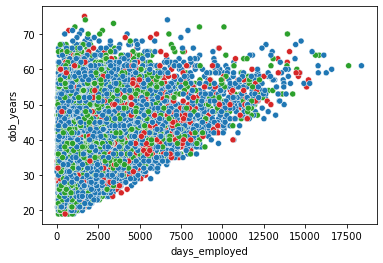

In [23]:
sns.scatterplot(x=df[(df['income_type'] != 'пенсионер') & (df['income_type'] != 'безработный')]['days_employed'], y=df['dob_years'], hue=df['income_type'], legend=False)

Без этих аномальных значений выглядит все нормально. 

Тогда можно просто заменить все аномальные значения, но менять их на среднее не совсем корректно. Можно предположить, что трудовой стаж напрямую коррелируется с возрастом.

In [24]:
#категоризируем возраст
df['age_group'] = pd.qcut(df['dob_years'],5)
# смотрим среднее трудового стажа по категориям возрастов за исключением аномальных значений
df[(df['income_type'] != 'пенсионер') & (df['income_type'] != 'безработный')].groupby('age_group')['days_employed'].agg(['count','mean'])

,count,mean
age_group,,
"(18.999, 32.0]",4323,1371.897958
"(32.0, 39.0]",3633,2158.654704
"(39.0, 47.0]",3880,2662.874916
"(47.0, 56.0]",3034,3138.560724
"(56.0, 75.0]",1036,3667.583100


<AxesSubplot:>

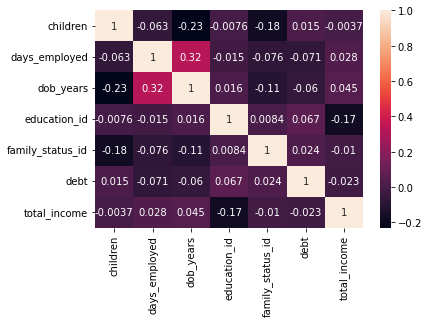

In [25]:
sns.heatmap(data=df[(df['income_type'] != 'пенсионер') & (df['income_type'] != 'безработный')].corr(), annot=True)

<AxesSubplot:xlabel='age_group'>

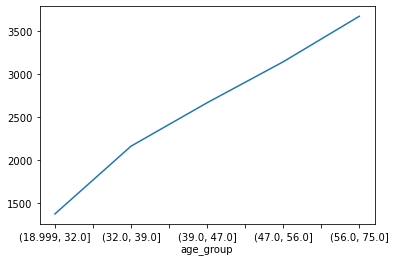

In [26]:
df[(df['income_type'] != 'пенсионер') & (df['income_type'] != 'безработный')].groupby('age_group')['days_employed'].mean().plot()

По таблице и графикам можно увидеть, что *трудовой стаж* коррелируется  только с *возрастом*. Поэтому для заполнения пустых и аномальных значений по *трудовому стажу* можно использовать данные по *возрасту*. Рассчитаем коэффициент для расчета *трудового стажа* в зависимости от *возраста* и напишем функцию для корректировки трудового стажа по возрасту.

In [27]:
days_employed_per_dob_years = (df['days_employed'] / df['dob_years']).mean()

def correction_days_employed_by_dob_years(row):
    if (row['income_type'] in ['пенсионер', 'безработный'] or 
        np.isnan(row['days_employed'])):
        row['days_employed'] = row['dob_years'] * days_employed_per_dob_years
    return row

In [28]:
df = df.apply(correction_days_employed_by_dob_years, axis=1)

In [29]:
print("Количество пропусков в 'трудовом стаже'  - ", df['days_employed'].isna().sum())

Количество пропусков в 'трудовом стаже'  -  0


<AxesSubplot:xlabel='days_employed', ylabel='dob_years'>

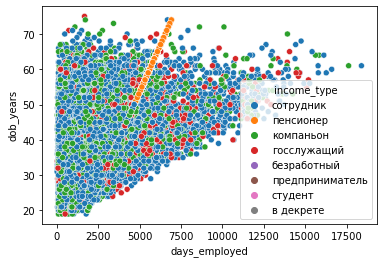

In [30]:
sns.scatterplot(x=df['days_employed'], y=df['dob_years'], hue=df['income_type'], legend=True)

Пропуски и аномалии пропали, *пенсионеры* конечно не совсем правильно распределены, но как с ними можно было поступить лучше - это вопрос!?

### Исправление пропусков в данных о ежемесячном доходе

In [31]:
print('Доля пропущенных данных о доходе - {:.1%}'.format(df['total_income'].isna().mean()))

Доля пропущенных данных о доходе - 10.1%


Доля пропусков довольна велика!? Посмотрим как в среднем зависит *ежемесячный доход* от *типа занятости*.

In [32]:
df.groupby('income_type')['total_income'].agg(['count', 'mean'])

,count,mean
income_type,,
безработный,2,131339.751676
в декрете,1,53829.130729
госслужащий,1312,170898.309923
компаньон,4577,202417.461462
пенсионер,3443,137127.465690
предприниматель,1,499163.144947
сотрудник,10014,161380.260488
студент,1,98201.625314


*Ежемесячный доход* довольно сильно изменяется в зависимости от *типа занятости*. Поэтому для заполнения пропусков в *доходе* мы будем опираться на средние значения по *типам занятости*.

In [33]:
# создадим словарь {тип занятости : средний доход}
avg_income_by_type = df.groupby('income_type')['total_income'].mean().to_dict() 
display (avg_income_by_type)
def fillnan_total_income(row):
    if np.isnan(row['total_income']):                                # для пустых ячеек с ежемесячным доходом
        row['total_income'] = avg_income_by_type[row['income_type']] # возьмем среднее значение по типу из словаря
    return row

{'безработный': 131339.7516762103,
 'в декрете': 53829.13072905995,
 'госслужащий': 170898.30992266268,
 'компаньон': 202417.4614617771,
 'пенсионер': 137127.4656901654,
 'предприниматель': 499163.1449470857,
 'сотрудник': 161380.26048788553,
 'студент': 98201.62531401133}

In [34]:
df = df.apply(fillnan_total_income, axis=1)

In [35]:
print("Количество пропусков в 'ежемесячном доходе'  - ", df['total_income'].isna().sum())

Количество пропусков в 'ежемесячном доходе'  -  0


Пропуски в *ежемесячном доходе* заполнены.

### Исправление дубликатов в данных об образовании

Посмотрим на уникальные значения в данных об *образовании*

In [36]:
sorted(df['education'].unique())

['ВЫСШЕЕ',
 'Высшее',
 'НАЧАЛЬНОЕ',
 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
 'Начальное',
 'Неоконченное высшее',
 'СРЕДНЕЕ',
 'Среднее',
 'УЧЕНАЯ СТЕПЕНЬ',
 'Ученая степень',
 'высшее',
 'начальное',
 'неоконченное высшее',
 'среднее',
 'ученая степень']

Причина дубликатов - разный регистр написания.

Приведем данные к единому регистру

In [37]:
df['education'] = df['education'].str.lower()
sorted(df['education'].unique())

['высшее', 'начальное', 'неоконченное высшее', 'среднее', 'ученая степень']

Дубликатов больше нет.

### Удаление дубликатов

Найдем явные дубликаты в данных и удалим их

In [38]:
print('Доля явных дубликатов {:.1%}'.format(df.duplicated().mean()))

Доля явных дубликатов 0.3%


In [39]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

Дубликатов больше нет

### Преобразование данных о доходе, трудовом стаже  количестве детей в целочисельный формат

In [40]:
df.dtypes

children                             float64
days_employed                        float64
dob_years                              int64
education                             object
education_id                           int64
family_status                         object
family_status_id                       int64
gender                                object
income_type                           object
debt                                   int64
total_income                         float64
purpose                               object
age_group           interval[float64, right]
dtype: object

In [41]:
df = df.astype({'days_employed' : 'int', 'total_income' : 'int', 'children' : 'int'})
df.dtypes

children                               int32
days_employed                          int32
dob_years                              int64
education                             object
education_id                           int64
family_status                         object
family_status_id                       int64
gender                                object
income_type                           object
debt                                   int64
total_income                           int32
purpose                               object
age_group           interval[float64, right]
dtype: object

In [42]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"(39.0, 47.0]"
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"(32.0, 39.0]"
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"(32.0, 39.0]"
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"(18.999, 32.0]"
4,0,4957,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"(47.0, 56.0]"


Все пропуски, дубликаты и аномалии обработаны, данные привидены к нужному формату. Можно продолжать работать с данными дальше, помня только то, что данные по трудовому стажу не вполне надежны и сильно опираться на них при анализе не стоит.

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим дполнительные словари для данных об *образовании* и *семейном статусе* и уберем лишние столбцы из основного датафрейма.

In [43]:
education_dict = df[['education_id', 'education']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True)

family_status_dict = df[['family_status_id', 'family_status']]
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True)

df = df.drop(['education', 'family_status'], axis=1)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,"(39.0, 47.0]"
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,"(32.0, 39.0]"
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,"(32.0, 39.0]"
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,"(18.999, 32.0]"
4,0,4957,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,"(47.0, 56.0]"


In [44]:
display(education_dict)
family_status_dict

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


Словари `education_dict` и `family_status_dict` созданы, лишние данные из датафрейма удалены

### Категоризация дохода.

На основании данных о *ежемесячном доходе* создадим следующие категории:
* **0–30000** — `E`;
* **30001–50000** — `D`;
* **50001–200000** — `C`;
* **200001–1000000** — `B`;
* **1000001 и выше** — `A`

In [45]:
df['total_income_category'] = pd.cut(df['total_income'], [0, 30000, 50000, 200000, 1000000, float('inf')], right=True, labels=['E', 'D', 'C', 'B', 'A'])
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,age_group,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,"(39.0, 47.0]",B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,"(32.0, 39.0]",C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,"(32.0, 39.0]",C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,"(18.999, 32.0]",B
4,0,4957,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,"(47.0, 56.0]",C


### Категоризация целей кредита.

Разобъем разрозненное указание *целей кредита* на следущие категории:
* **операции с автомобилем**
* **операции с недвижимостью**
* **проведение свадьбы**
* **получение образования**

In [46]:
# посмотрим уникальные значения в столбце 'purpose'
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [47]:
def categorize_purpose(purpose):
    if 'жиль' in purpose or 'недвиж' in purpose:
        return 'операции с недвижимостью'
    elif 'автом' in purpose:
        return 'операции с автомобилем'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    elif 'образов' in purpose:
        return 'получение образования'
    return 'цель не определена'

In [48]:
df['purpose_category'] = df['purpose'].apply(categorize_purpose)
df['purpose_category'].value_counts(dropna=False)

операции с недвижимостью    10811
операции с автомобилем       4306
получение образования        4013
проведение свадьбы           2324
Name: purpose_category, dtype: int64

Все данные по *целям кредита* разбиты на четыре целевые категории, *неопределенных* целей и пропусков нет.

## Ответы на вопросы.

### Есть ли зависимость между количеством детей клиента и возвратом кредита в срок?

In [49]:
debt_by_children = df.pivot_table(values='debt', index='children', aggfunc=['count', 'mean'])
debt_by_children

,count,mean
,debt,debt
children,,
0,14214,0.075419
1,4808,0.092346
2,2052,0.094542
3,330,0.081818
4,41,0.097561
5,9,0.000000


**Вывод**

**Клиенты с детьми, чаще допускают задолжность по кредитам, чем бездетные**, причем увеличение количества детей напрямую не влияет на вероятность задолжности(клиенты с 3 детьми даже реже просрачивают кредит, чем с 1 или 2 детьми, но тут уже не очень больщой объем выборки может играть роль)

###  Есть ли зависимость между семейным положением клиента и возвратом кредита в срок?

In [50]:
debt_by_family_status = df.groupby('family_status_id')['debt'].agg(['count', 'mean'])
debt_by_family_status.merge(family_status_dict, how='right', on='family_status_id')[['family_status', 'count', 'mean']]

,family_status,count,mean
0,женат / замужем,12339,0.075452
1,гражданский брак,4151,0.093471
2,вдовец / вдова,959,0.065693
3,в разводе,1195,0.071130
4,Не женат / не замужем,2810,0.097509


**Вывод**

**Неженатые и клиенты в гражданском браке, чаще допускают задолжность по кредитам, чем клиенты, состоящие в официальном браке, вдовцы и разведенные.**

###  Есть ли зависимость между возрастом клиента и возвратом кредита в срок?

In [51]:
debt_by_age = df.pivot_table(values='debt', index='age_group', aggfunc=['count','mean'])
debt_by_age

,count,mean
,debt,debt
age_group,,
"(18.999, 32.0]",4785,0.110972
"(32.0, 39.0]",4057,0.091200
"(39.0, 47.0]",4391,0.078798
"(47.0, 56.0]",4348,0.065777
"(56.0, 75.0]",3873,0.053705


**Вывод**

Между возрастом и задолжностью по кредиту хорошо прослеживается связь. **Чем моложе клиент, тем больше вероятность, что он просрочит возврат кредита.**

###  Есть ли зависимость между величиной дохода клиента и возвратом кредита в срок?

In [52]:
debt_by_income = df.pivot_table(values='debt', index='total_income_category', aggfunc=['count', 'mean'])
debt_by_income

,count,mean
,debt,debt
total_income_category,,
E,22,0.090909
D,350,0.060000
C,15514,0.085729
B,5543,0.069637
A,25,0.080000


Не совсем удачно подобраны категории дохода (в категории `С` - больше половины выборки, а на три категории `A`, `D` и `E` приходится только 2% выборки.

Поделим данные о доходе на более равные по объему выборки.

In [53]:
df['total_income_group'] = pd.qcut(df['total_income'],5)
df['total_income_group'].value_counts()

(20666.999, 98537.6]     4291
(98537.6, 135448.4]      4291
(162638.8, 214618.2]     4291
(214618.2, 2265604.0]    4291
(135448.4, 162638.8]     4290
Name: total_income_group, dtype: int64

In [54]:
debt_by_income = df.pivot_table(values='debt', index='total_income_group', aggfunc=['count', 'mean'])
debt_by_income

,count,mean
,debt,debt
total_income_group,,
"(20666.999, 98537.6]",4291,0.080168
"(98537.6, 135448.4]",4291,0.082731
"(135448.4, 162638.8]",4290,0.089510
"(162638.8, 214618.2]",4291,0.083430
"(214618.2, 2265604.0]",4291,0.069914


**Вывод**

**Между величиной ежемесячного дохода и задолжностью по кредиту не прослеживается взаимосвязи**. Можно отметить только, что клиенты с "высоким" доходом ( > 220 тыс.) немного реже допускают задолжность.

###  Есть ли зависимость между целью кредита и возвратом кредита в срок?

In [55]:
debt_by_purpose = df.pivot_table(values='debt', index='purpose_category', aggfunc=['count', 'mean'])
debt_by_purpose

,count,mean
,debt,debt
purpose_category,,
операции с автомобилем,4306,0.093590
операции с недвижимостью,10811,0.072334
получение образования,4013,0.092200
проведение свадьбы,2324,0.080034


**Вывод**

**Клиенты, которые берут кредит c целью покупки недвижимости, добросовестнее всех относятся к обязательствам по кредиту**. Клиенты, целью кредита которых является автомобиль или образование, чаще  оказываются в должниках. 

###  Есть ли зависимость между образованием клиента и возвратом кредита в срок?

В этом пункте рассмотрим зависимость между образованием и возвратом кредита, а также между образованием и ежемесячным доходом

In [56]:
debt_by_education = df.groupby('education_id')[['debt','total_income']].agg(['count', 'mean'])
debt_by_education.columns = ['_'.join(col).strip() for col in debt_by_education.columns.values]
(debt_by_education.merge(education_dict, how='right', on='education_id')
 [['education', 'debt_count', 'debt_mean', 'total_income_count', 'total_income_mean']])

,education,debt_count,debt_mean,total_income_count,total_income_mean
0,высшее,5250,0.052952,5250,203860.279048
1,среднее,15172,0.089902,15172,154795.910032
2,неоконченное высшее,744,0.091398,744,180648.776882
3,начальное,282,0.109929,282,134028.354610
4,ученая степень,6,0.000000,6,174749.833333


**Вывод**

Образование также влияет на вероятность возврата кредита в срок. **Клиенты с высшим реже допускают задолжности по кредиту, чем клиенты со средним и начальным образованием** (причина скорее всего в большем доходе и соответственно платежеспособности кредитуемого).

## Общий вывод:


**Целью нашего исследования** было изучение влияния *семейного положения* и *количества детей* клиента на факт погашения кредита в срок.

**На входе** мы имели выборку данных по более чем 21 тысяче клиентов банка. Для каждого клиента была предоставлена следующая информация:
* количество детей в семье
* общий трудовой стаж
* возраст
* уровень образования
* семейное положение
* пол
* тип занятости
* ежемесячный доход
* цель получения кредита
* информация о наличии задолженностей по возврату кредита

В данных **на стадии предобработки** были выявлены и устранены следующие недостатки:
 - в данных о *количестве детей* были выявлены аномальные значения (`-1` и `20`), они в сумме составили всего порядка 0,5 % от выборки и были заменены на мединное значение количества детей (`0`)
 - в данных о *поле* была выявлена одна несоответствующая стандартам запись (`XNA`) и заменена на моду по полу (`F`)
 - в данных о *возрасте* были выявлены `нулевые` значения (менее 1% от выборки) и были заменены на среднее значение возраста в зависимости от типа занятости (для более корректного определения возраста пенсионеров) 
 - в данных о *трудовом стаже* имелись аномальные значения и пропуски, они были обработаны и заполнены значениями в зависимости от возраста клиента (мы установили, что стаж коррелируется с возрастом)
 - в данных о *ежемесячном доходе* имелись пропуски (порядка 10% от массива), они были заполнены значениями в зависимости от типа занятости клиента (мы установили, что ежемесячный доход сильно изменяется в зависимоти от типа занятости)
 - в данных об *образовании* имелись неявные дубликаты, причина возникновения которых была в разном регистре написания, данные были приведены к единому регистру для обработки дубликатов
 - в данных также были выявлены явные дубликаты (0,3% от выборки), явные дубликаты были удалены
 
Для целей анализа данных нами была произведена **категоризация** данных о ежемесячном доходе, а также группировка данных по целям кредита. 

По всем представленным параметрам нами были сделаны **сводные таблицы**, которые позволили нам отметить следующие закономерности:
* **Бездетные клиенты с меньшей вероятностью допускают задолжность по возврату кредита** (чем меньше детей, тем более платежеспособен человек)
* **Клиенты состоящие или состоявшие (вдовцы/разведенные) в официальном браке с меньшей вероятностью допускают задолжность по возврату кредита** (люди в семейных отношениях более отвественно относятся к обязательствам)

Но мы также слегка вышли за рамки исследования, и изучили дополнительно и другие факторы, влияющие на вероятность погашения кредита в срок, такие как *возраст*, *образование* и *цель кредита*. 

* **Чем старше клиент, тем меньше вероятность задолжности по возврату кредита** (с возрастом люди становятся более отвественны и платежеспособны)
* **Клиенты с высшим образованием с меньшей вероятностью допускают задолжность по возврату кредита** (человек с высшим образованием более платежеспособен)
* **Клиенты, целью кредита которых, является недвижимость (свадьба в меньшей степени) с меньшей вероятностью допускают задолжность по возврату кредита** (это скорее всего люди либо в уже состоящие в браке, либо скоро в нем будут состоять, а они, как мы отмечали выше, с меньшей вероятностью допускают задолжности)

И в конце опишем портрет *идеального* для банка клиента, который с  высокой вероятностью не допустит задолжности по возврату кредита.

*Состоящий или состоявший в браке человек, без детей, старше 50 лет, с высшим образованием, целью кредита которого является операция с недвижимостью*

И в противовес ему наиболее *опасный* для банка клиент.

*Одинокий молодой человек без высшего образования, целью кредита которого являются образование либо автомобиль*